In [10]:
from problems.golomb_simple import udp
from modules.grey_wolf_optimizer import gwo
from modules.plotter import print_resoult
from pyMetaheuristic.algorithm import grey_wolf_optimizer, improved_grey_wolf_optimizer, adaptive_chaotic_grey_wolf_optimizer

fitness = lambda solution: udp.fitness(solution)[0]

vettore corrispondente alla miglior ricostruzione dell'immagine 

In [2]:
best_pos_ever = [-0.000599, -0.007124, 0.002772, 0.005313, -0.007049, 0.032415, -0.289797, 0.060649, -0.319332, -0.368774, -0.037936, -0.173303, -0.194020, 0.009454, 0.145101, 0.065171, -0.122505, 0.069189, -0.445443, 0.074369, -0.007291, -0.032741, 0.039555, -0.003120, -0.000946, -0.002305, -0.056462, 0.079689, -0.015379, 0.083645]

## Grey Wolf optimizer

GWO libs : https://pypi.org/project/pyMetaheuristic/

### Simple Grey Wolf Optimizer (NO libs)
docs GWO No libs : https://www.geeksforgeeks.org/implementation-of-grey-wolf-optimization-gwo-algorithm/ 

In [3]:
best_position_gwo = gwo(
    fitness, 
    max_iter = 400, 
    num_particles = 150, 
    dim = 30, 
    minx=-1, 
    maxx=1
)  


Begin grey wolf optimization on rastrigin function

Setting num_particles = 150
Setting max_iter    = 400

Starting GWO algorithm

Iter = 10 best fitness = -0.0703
Iter = 20 best fitness = -0.0748
Iter = 30 best fitness = -0.0794
Iter = 40 best fitness = -0.0794
Iter = 50 best fitness = -0.0794
Iter = 60 best fitness = -0.0884
Iter = 70 best fitness = -0.0884
Iter = 80 best fitness = -0.0884
Iter = 90 best fitness = -0.0884
Iter = 100 best fitness = -0.0884
Iter = 110 best fitness = -0.0884
Iter = 120 best fitness = -0.0884
Iter = 130 best fitness = -0.0884
Iter = 140 best fitness = -0.0884
Iter = 150 best fitness = -0.0884
Iter = 160 best fitness = -0.0884
Iter = 170 best fitness = -0.0884
Iter = 180 best fitness = -0.0884
Iter = 190 best fitness = -0.0884
Iter = 200 best fitness = -0.0884
Iter = 210 best fitness = -0.0884
Iter = 220 best fitness = -0.0884
Iter = 230 best fitness = -0.0884
Iter = 240 best fitness = -0.0884
Iter = 250 best fitness = -0.0884
Iter = 260 best fitness = -

solution:  [-0.002115667690240237, -0.09543827642393228, -0.015818313073519625, -0.01283913550319729, -0.032105709467339656, 0.08728684688402637, -0.20371133612280237, -0.3151984437689909, -0.15611517597591382, -0.9685138274289514, -0.4380773151152369, 0.04511714370093767, -0.17499298211858846, 0.0016676237067665752, -0.0001138465719620757, 0.04633356818681147, -0.04187295959101622, -0.0012282766077907324, -0.18874001557793796, -0.10790050084429971, -0.005297096296954083, -0.23833464070306162, -0.03842586404901612, -0.012208255917913434, -0.140563103603486, 0.0002866257064168866, -0.057819379060980024, -0.04598856662179668, 0.008854713807441815, -0.03340895012900996]
wrost Fill factor: -0.08844  ,	 wrost Empty factor(?) : 0.91156
XY


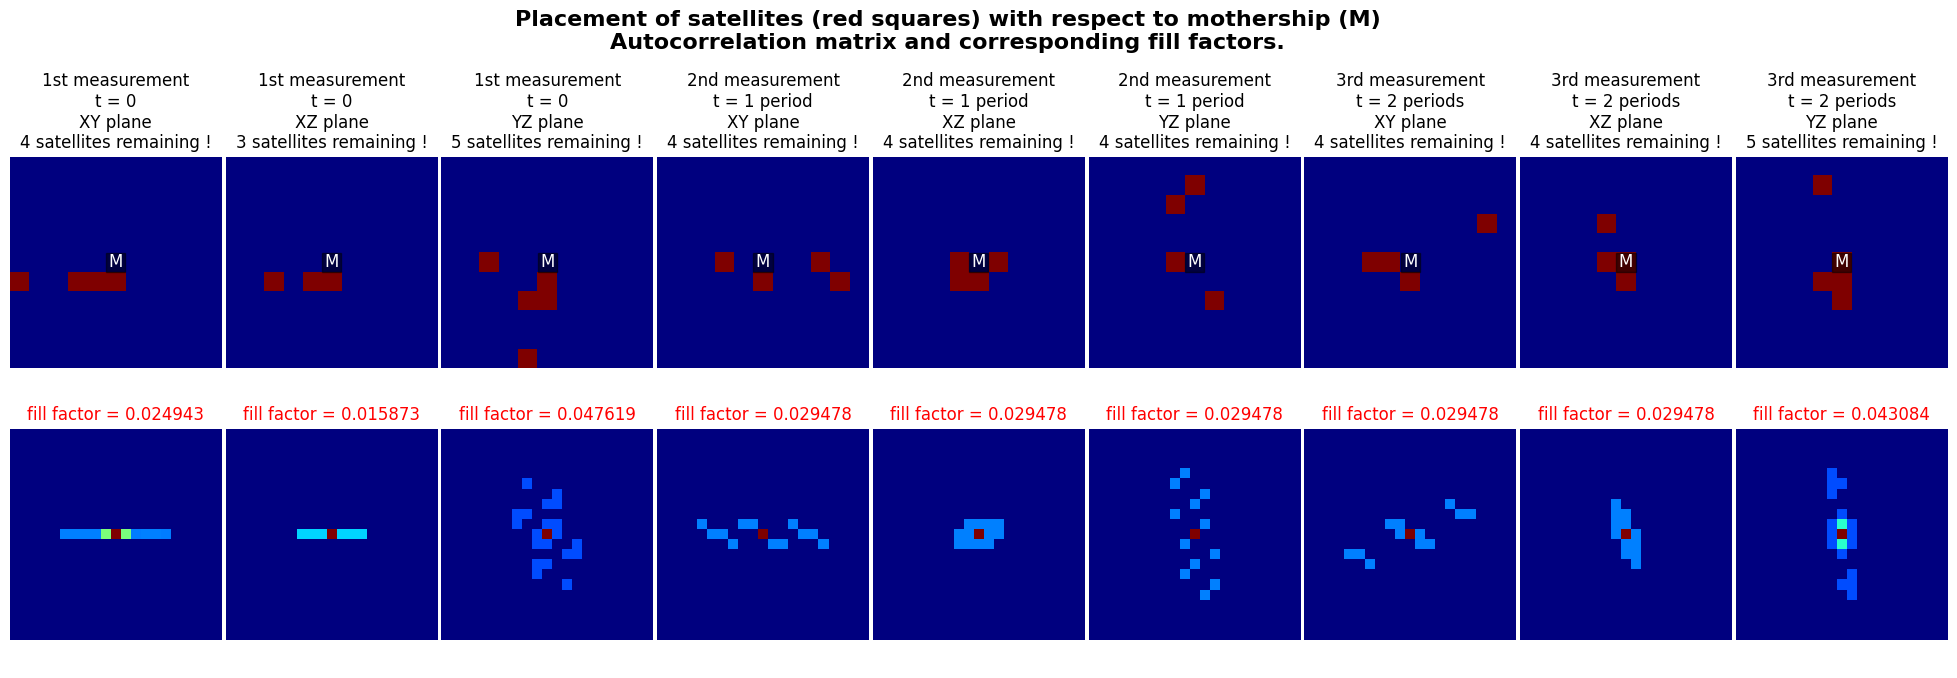

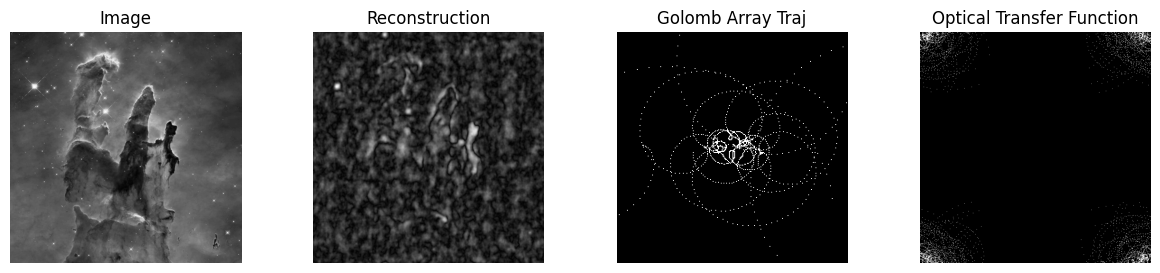

XZ


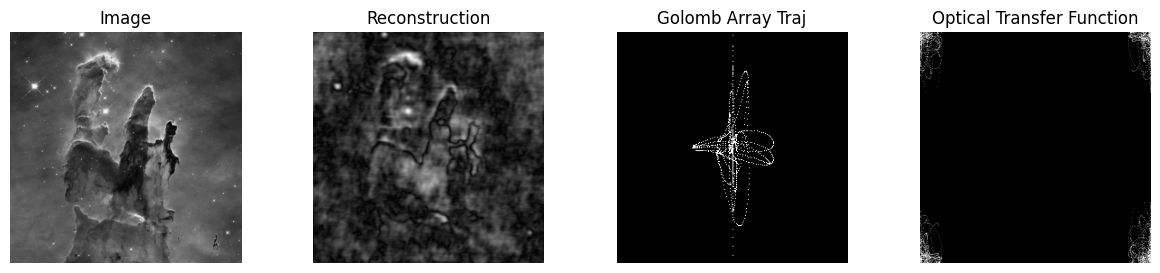

YZ


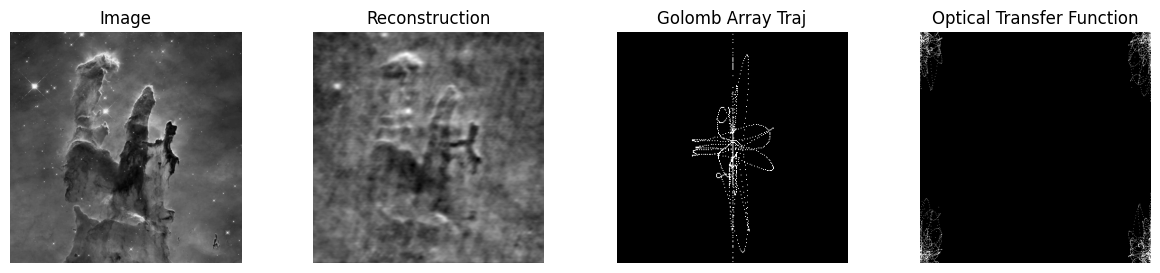

In [4]:
print_resoult(udp, best_position_gwo,image_path="../data/nebula.jpg")

### Grey Wolf Optimizer (Using Libs)

In [12]:
parameters = {
    'pack_size': 25,
    'min_values': [-1]*30,
    'max_values': [1]*30,
    'iterations': 1500,
	'verbose': True,
	'start_init': None,
	'target_value': None
}

gwo = grey_wolf_optimizer(target_function = fitness, **parameters)

Iteration =  0  f(x) =  -0.006802721088435375
Iteration =  1  f(x) =  -0.006802721088435375
Iteration =  2  f(x) =  -0.006802721088435375
Iteration =  3  f(x) =  -0.006802721088435375
Iteration =  4  f(x) =  -0.015873015873015872
Iteration =  5  f(x) =  -0.02040816326530612
Iteration =  6  f(x) =  -0.02040816326530612
Iteration =  7  f(x) =  -0.02040816326530612
Iteration =  8  f(x) =  -0.02040816326530612
Iteration =  9  f(x) =  -0.02040816326530612
Iteration =  10  f(x) =  -0.02040816326530612
Iteration =  11  f(x) =  -0.02040816326530612
Iteration =  12  f(x) =  -0.02040816326530612
Iteration =  13  f(x) =  -0.02040816326530612
Iteration =  14  f(x) =  -0.02040816326530612
Iteration =  15  f(x) =  -0.02040816326530612
Iteration =  16  f(x) =  -0.02040816326530612
Iteration =  17  f(x) =  -0.02040816326530612
Iteration =  18  f(x) =  -0.02040816326530612
Iteration =  19  f(x) =  -0.04308390022675737
Iteration =  20  f(x) =  -0.04308390022675737
Iteration =  21  f(x) =  -0.04308390022

solution:  [-0.3746072   0.01306085 -0.38719994 -0.00507579 -0.3721646   0.21660791
 -0.28648255 -0.12572054  0.05615556  0.47289924 -0.37372116 -0.18569442
  0.97955243 -0.2499031  -0.35439961 -0.08589621 -0.46311181 -0.36879395
 -0.23071584  0.82975282 -0.96233465 -0.01950269 -0.96035384 -0.06818183
 -1.         -0.92413469  0.94668815  0.50857794 -0.3705516   0.21801054]
wrost Fill factor: -0.13832  ,	 wrost Empty factor(?) : 0.86168
XY


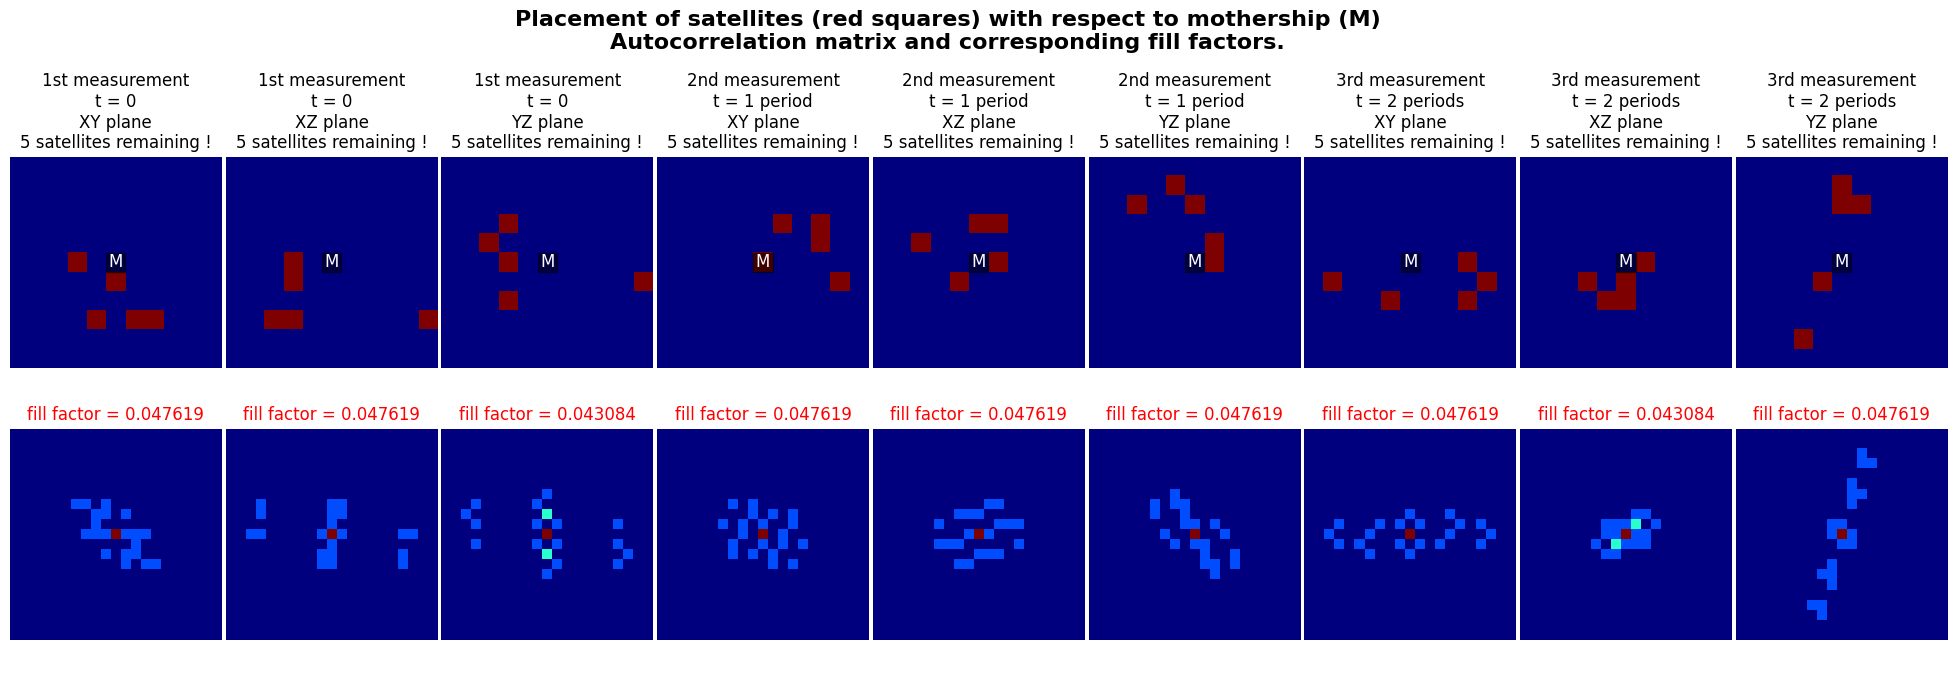

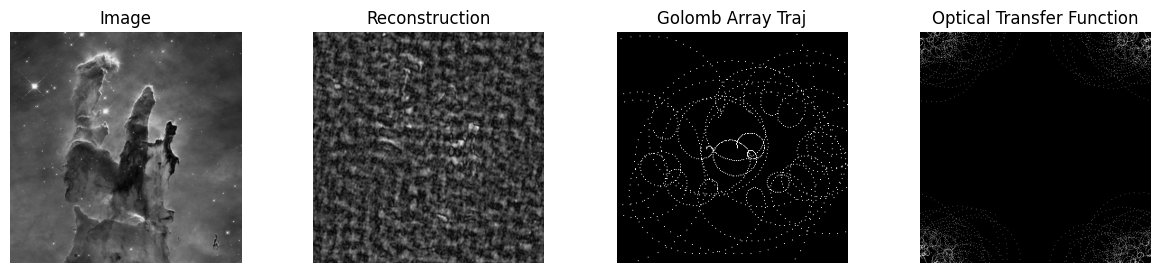

XZ


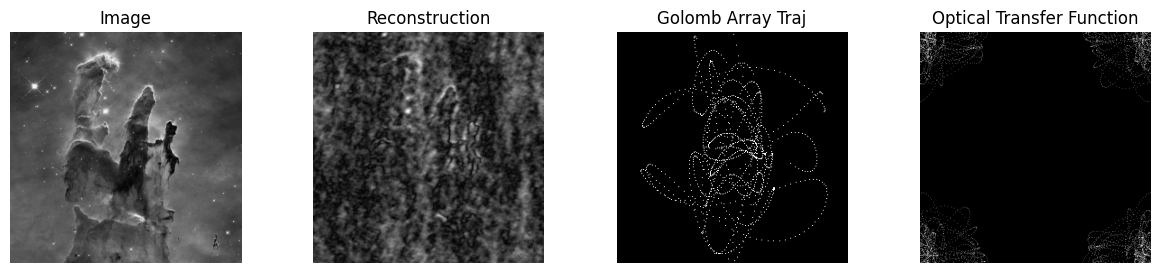

YZ


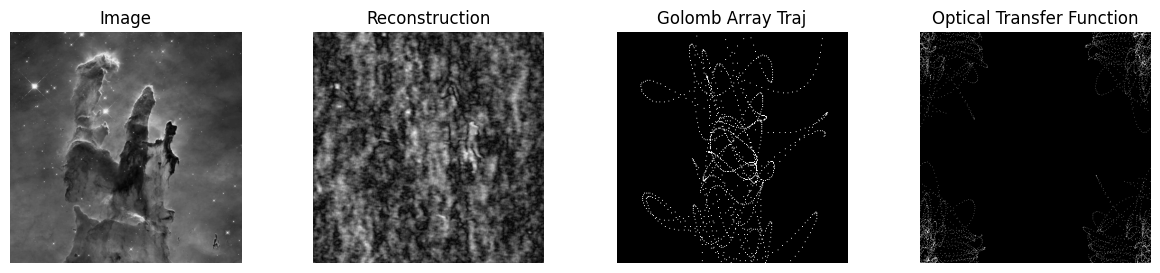

In [13]:
best_position_gwo = gwo[:-1]
print_resoult(udp, best_position_gwo,image_path="../data/nebula.jpg")

### Improve Grey Wolf Optimizer (Using Libs)

In [ ]:
parameters = {
    'pack_size': 25,
    'min_values': [-1]*30,
    'max_values': [1]*30,
    'iterations': 1500,
	'verbose': True,
	'start_init': None,
	'target_value': None
}

igwo = improved_grey_wolf_optimizer(target_function = fitness, **parameters)  

Iteration =  0  f(x) =  -0.006802721088435375
Iteration =  1  f(x) =  -0.0
Iteration =  2  f(x) =  -0.006802721088435375
Iteration =  3  f(x) =  -0.006802721088435375
Iteration =  4  f(x) =  -0.006802721088435375
Iteration =  5  f(x) =  -0.006802721088435375
Iteration =  6  f(x) =  -0.006802721088435375
Iteration =  7  f(x) =  -0.006802721088435375
Iteration =  8  f(x) =  -0.006802721088435375
Iteration =  9  f(x) =  -0.006802721088435375
Iteration =  10  f(x) =  -0.006802721088435375
Iteration =  11  f(x) =  -0.006802721088435375
Iteration =  12  f(x) =  -0.006802721088435375
Iteration =  13  f(x) =  -0.006802721088435375
Iteration =  14  f(x) =  -0.006802721088435375
Iteration =  15  f(x) =  -0.006802721088435375
Iteration =  16  f(x) =  -0.006802721088435375
Iteration =  17  f(x) =  -0.02040816326530612
Iteration =  18  f(x) =  -0.02040816326530612
Iteration =  19  f(x) =  -0.02040816326530612
Iteration =  20  f(x) =  -0.02040816326530612
Iteration =  21  f(x) =  -0.0204081632653061

Iteration =  309  f(x) =  -0.1383219954648526
Iteration =  310  f(x) =  -0.14285714285714285
Iteration =  311  f(x) =  -0.14285714285714285
Iteration =  312  f(x) =  -0.14285714285714285
Iteration =  313  f(x) =  -0.14285714285714285
Iteration =  314  f(x) =  -0.14285714285714285
Iteration =  315  f(x) =  -0.14285714285714285
Iteration =  316  f(x) =  -0.14285714285714285
Iteration =  317  f(x) =  -0.14285714285714285
Iteration =  318  f(x) =  -0.14285714285714285
Iteration =  319  f(x) =  -0.14285714285714285
Iteration =  320  f(x) =  -0.14285714285714285
Iteration =  321  f(x) =  -0.14285714285714285
Iteration =  322  f(x) =  -0.14285714285714285
Iteration =  323  f(x) =  -0.14285714285714285
Iteration =  324  f(x) =  -0.14285714285714285
Iteration =  325  f(x) =  -0.14285714285714285
Iteration =  326  f(x) =  -0.14285714285714285
Iteration =  327  f(x) =  -0.14285714285714285
Iteration =  328  f(x) =  -0.14285714285714285
Iteration =  329  f(x) =  -0.14285714285714285
Iteration =  3

solution:  [ 0.0500298  -0.38430243 -0.30035454  0.08735616 -0.36070493  0.05358341
  0.50543582  0.00194116 -0.00796773  0.88021201 -0.2938961   0.01591192
  0.63735195  0.8618159   0.96453598  0.83890679 -0.01085874 -0.65270229
  0.95963478 -0.01438546  0.17622967 -1.         -0.8202958   0.28040305
 -1.         -1.         -0.08393227 -0.00232928  0.01184786  1.        ]
wrost Fill factor: -0.14286  ,	 wrost Empty factor(?) : 0.85714
XY


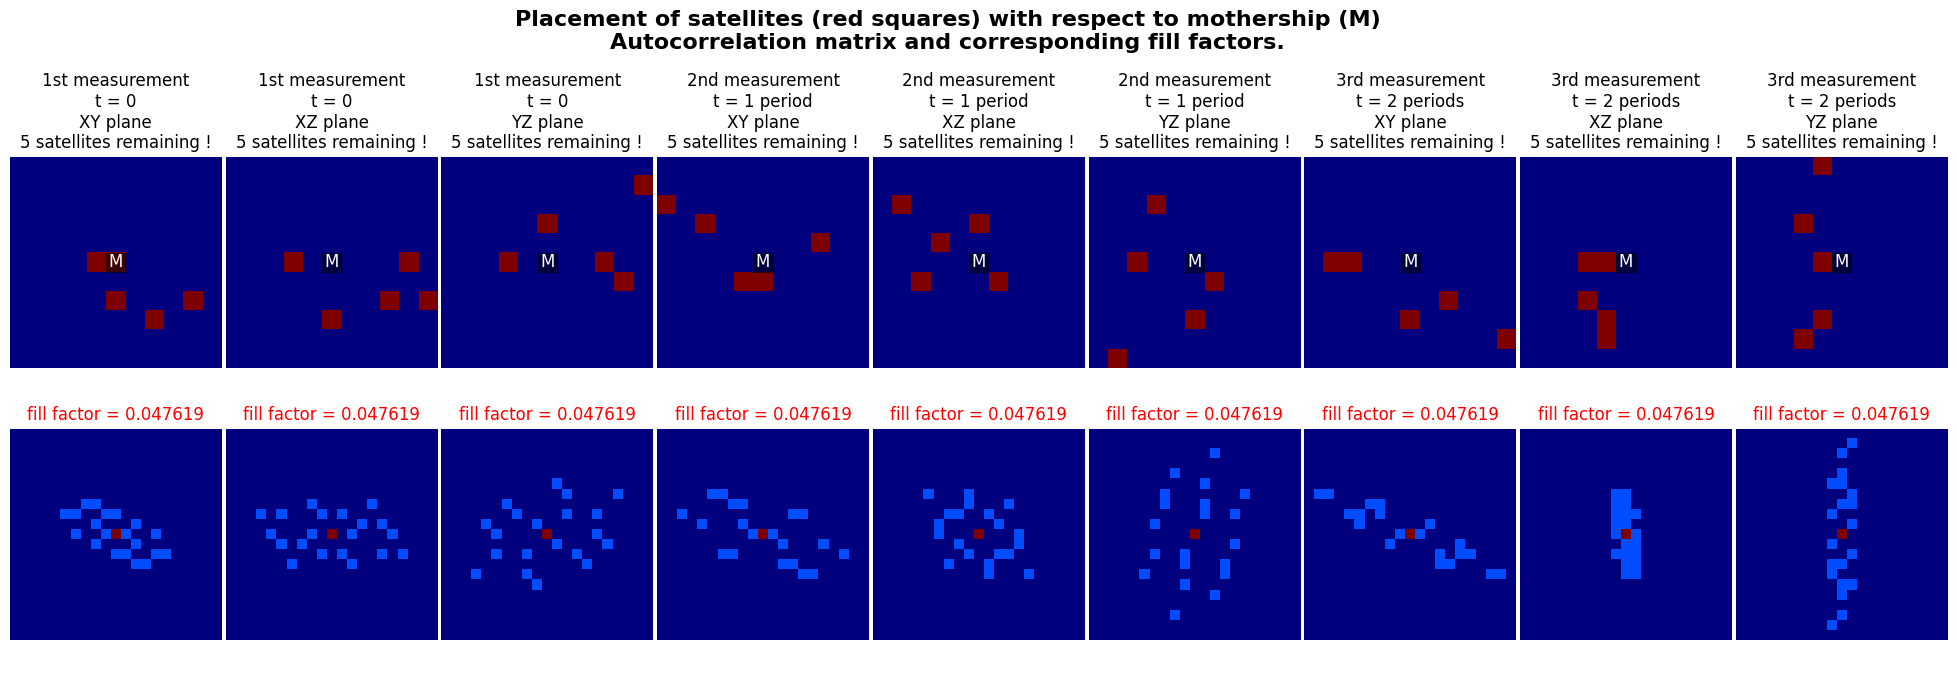

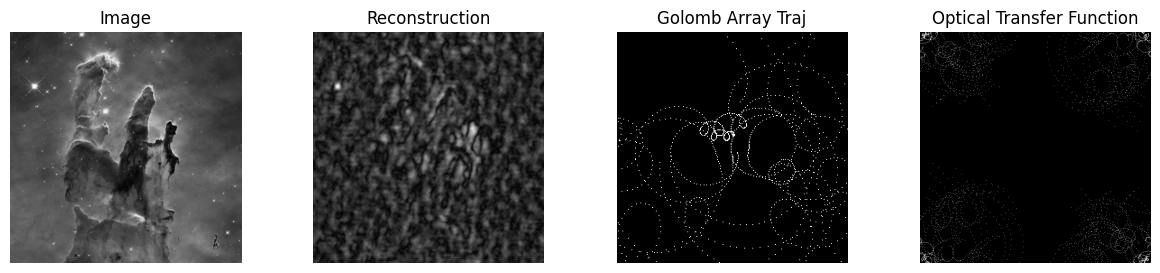

XZ


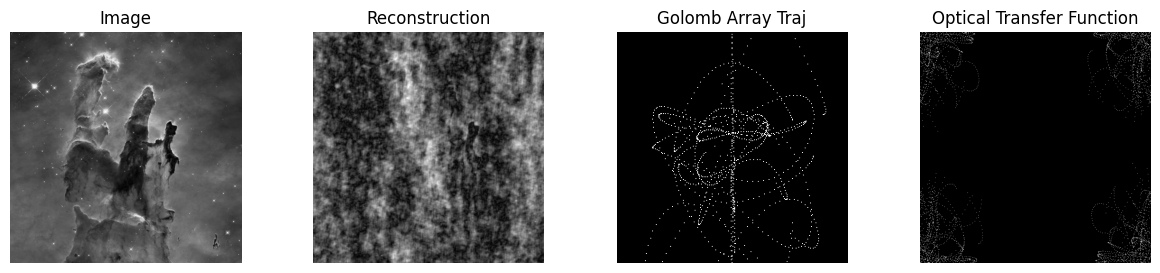

YZ


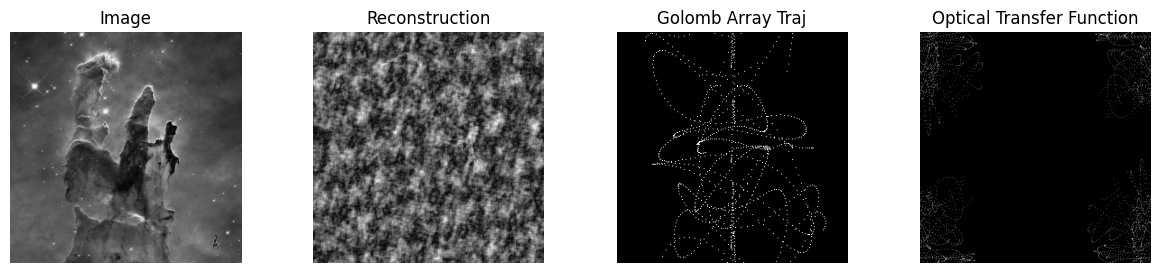

In [ ]:
best_position_igwo = igwo[:-1]
print_resoult(udp, best_position_igwo,image_path="../data/nebula.jpg")

### Adaptive Chaotic Grey Wolf Optimizer (Using Libs)

In [ ]:
parameters = {
    'size': 25,
    'min_values': [-1]*30,
    'max_values': [1]*30,
    'iterations': 1500,
    'lmbda': 0.3,
	'verbose': True,
	'start_init': None,
	'target_value': None
}

acgwo = adaptive_chaotic_grey_wolf_optimizer(target_function = fitness, **parameters)  


Iteration =  0  f(x) =  -0.006802721088435375
Iteration =  1  f(x) =  -0.006802721088435375
Iteration =  2  f(x) =  -0.006802721088435375
Iteration =  3  f(x) =  -0.006802721088435375
Iteration =  4  f(x) =  -0.006802721088435375
Iteration =  5  f(x) =  -0.006802721088435375
Iteration =  6  f(x) =  -0.006802721088435375
Iteration =  7  f(x) =  -0.006802721088435375
Iteration =  8  f(x) =  -0.006802721088435375
Iteration =  9  f(x) =  -0.02040816326530612
Iteration =  10  f(x) =  -0.02040816326530612
Iteration =  11  f(x) =  -0.02040816326530612
Iteration =  12  f(x) =  -0.02040816326530612
Iteration =  13  f(x) =  -0.02040816326530612
Iteration =  14  f(x) =  -0.02040816326530612
Iteration =  15  f(x) =  -0.02040816326530612
Iteration =  16  f(x) =  -0.02040816326530612
Iteration =  17  f(x) =  -0.02040816326530612
Iteration =  18  f(x) =  -0.02040816326530612
Iteration =  19  f(x) =  -0.02040816326530612
Iteration =  20  f(x) =  -0.02040816326530612
Iteration =  21  f(x) =  -0.0204081

solution:  [ 2.45592506e-01 -9.16267206e-02  1.21649859e-01 -6.53019242e-03
  4.06305828e-01 -7.58982010e-01  2.30349644e-01 -1.27548808e-01
  9.84363584e-02 -3.00473302e-01  9.70996072e-02  6.43194512e-01
  1.32318118e-01 -3.27303093e-01  5.63057006e-01  1.57374821e-02
  3.40331264e-01  8.54718654e-03  5.37263042e-03  4.62229296e-01
  6.95422323e-01 -1.88107219e-01  3.54642741e-01  2.91904194e-04
  9.99705699e-01  1.00000000e+00 -1.00000000e+00  1.73822228e-01
 -1.00000000e+00  7.10390032e-01]
wrost Fill factor: -0.14286  ,	 wrost Empty factor(?) : 0.85714
XY


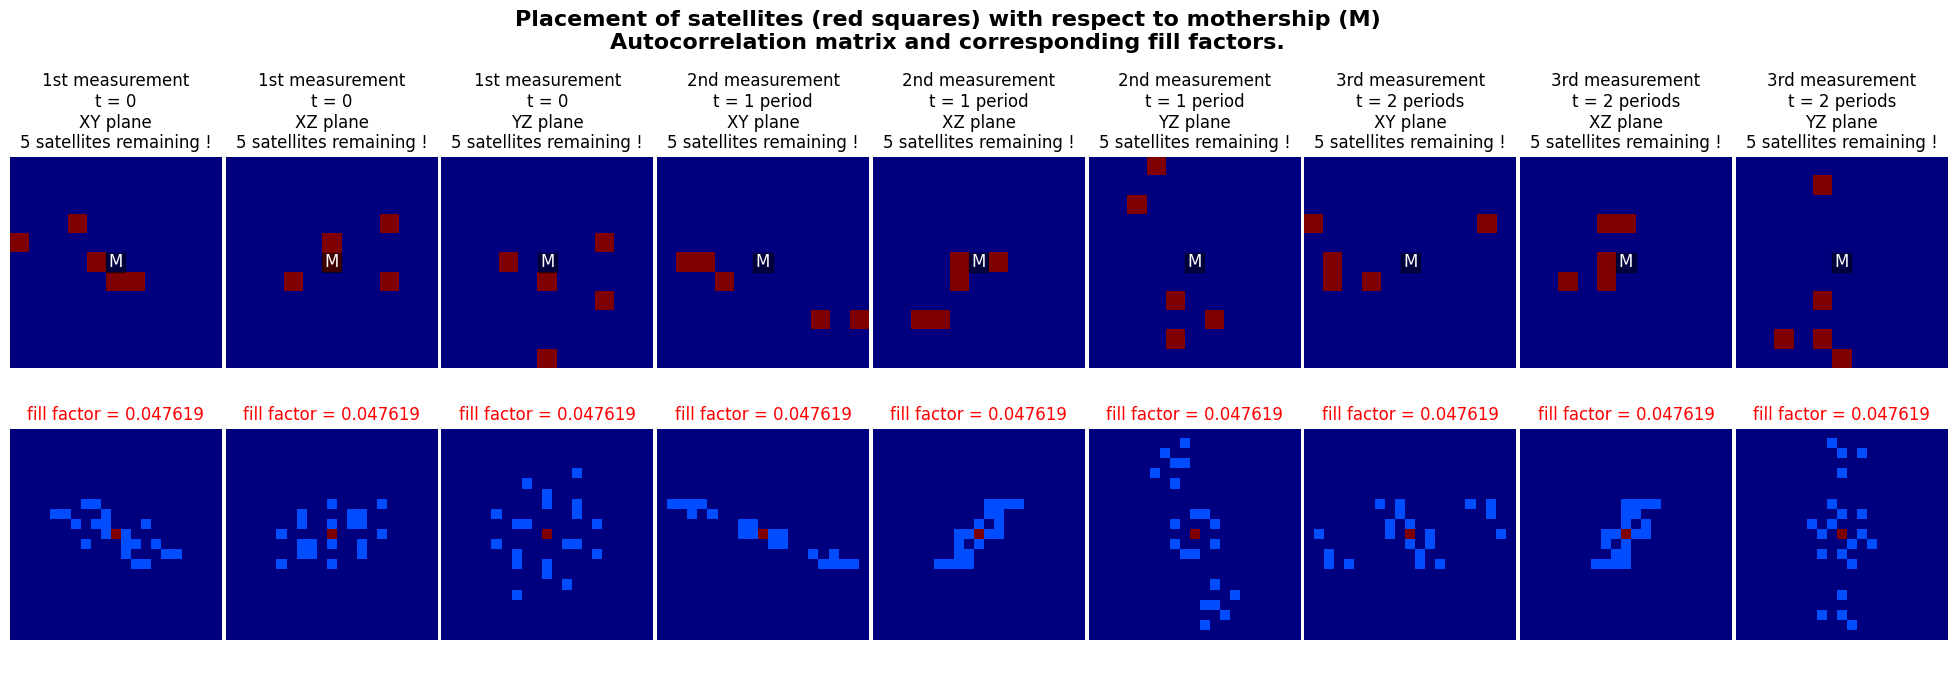

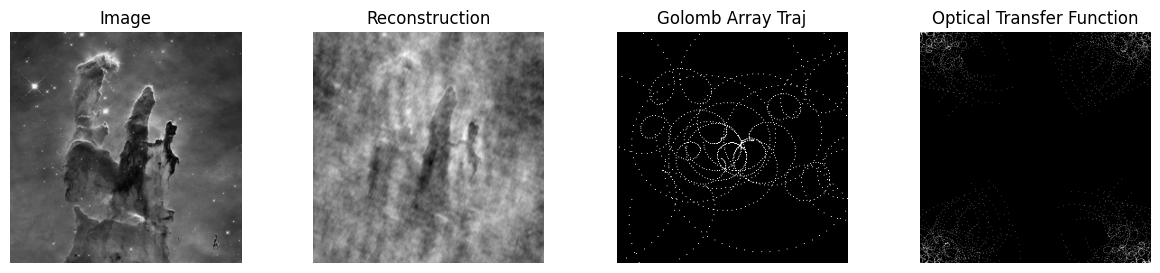

XZ


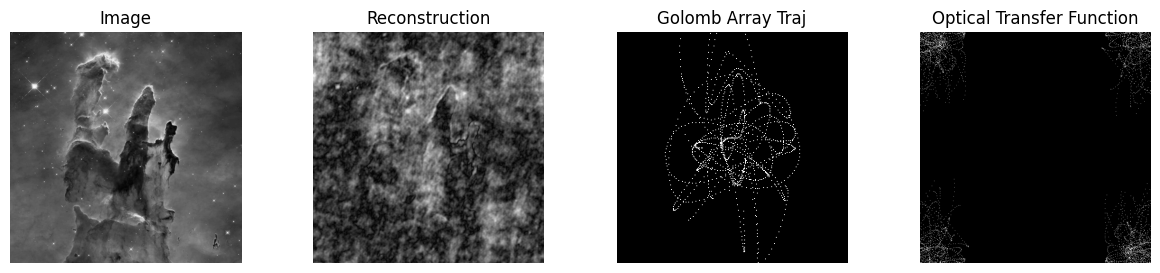

YZ


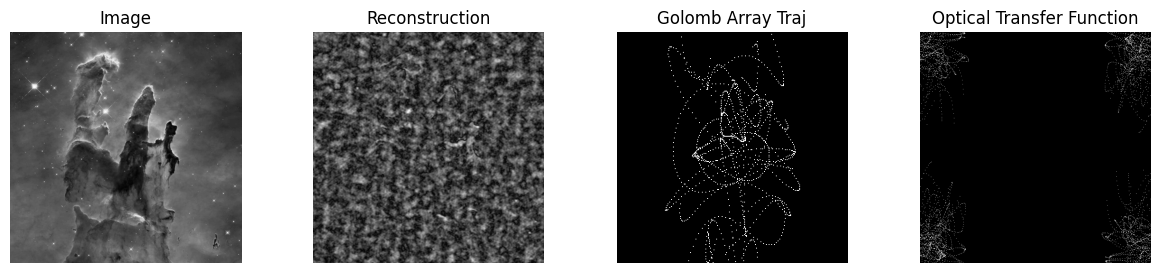

In [8]:
best_position_acgwo = acgwo[:-1]
print_resoult(udp, best_position_acgwo,image_path="../data/nebula.jpg")